## Power of Plots

In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from functools import reduce

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')
print(f'Number of rows: {len(data)}')

# Display the data table for preview
data.head()

Number of rows: 1893


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [31]:
# Checking the number of mice.

# Store the mouse IDs
# mouse = data['Mouse ID']

mice_num = data['Mouse ID'].unique()
print(f'Number of unique mice: {len(mice_num)}')

Number of unique mice: 249


In [32]:
# Find duplicated timepoints by mouse ID
duplicates = pd.concat(obs for _, obs in data.groupby(['Mouse ID','Timepoint']) if len(obs) > 1)

# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = duplicates['Mouse ID'].unique()

# Show IDs of duplicated data
print(f'Duplicated mouse ID: {duplicate_mice[0]}')

# Optional: Get all the data for duplicate mice
mouse_data = data.loc[data['Mouse ID'] == duplicate_mice[0]]
mouse_data


Duplicated mouse ID: g989


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [33]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
filter = data['Mouse ID'] != duplicate_mice[0]
clean_data = data[filter]
clean_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [34]:
# Checking the number of mice in the clean DataFrame.
print(f'Number of mice in clean DataFrame: {len(clean_data)}')

Number of mice in clean DataFrame: 1880


## Summary Statistics

In [35]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
avg = pd.DataFrame(clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()).rename(columns={'Tumor Volume (mm3)':'Mean'})
median = pd.DataFrame(clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()).rename(columns={'Tumor Volume (mm3)':'Median'})
variance = pd.DataFrame(clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()).rename(columns={'Tumor Volume (mm3)':'Variance'})
std_dev = pd.DataFrame(clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()).rename(columns={'Tumor Volume (mm3)':'Standard Deviation'})
std_err = pd.DataFrame(clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()).rename(columns={'Tumor Volume (mm3)':'Standard Error'})

# Assemble the resulting series into a single summary dataframe.
dfs_to_merge = [avg, median, variance, std_dev, std_err]
stats = reduce(lambda left,right: pd.merge(left,right, on=['Drug Regimen'], how='outer'), dfs_to_merge)
stats

,Mean,Median,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [36]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
stats_alt = clean_data.groupby('Drug Regimen').agg({
    'Tumor Volume (mm3)':['mean','median','var','std','sem']
})

# Rename columns
stats_alt = stats_alt.rename(columns={
    'mean':'Mean',
    'median':'Median',
    'var':'Variance',
    'std':'Standard Deviation',
    'sem':'Standard Error'
})

stats_alt

Tumor Volume (mm3)                                           \
                           Mean     Median   Variance Standard Deviation   
Drug Regimen                                                               
Capomulin             40.675741  41.557809  24.947764           4.994774   
Ceftamin              52.591172  51.776157  39.290177           6.268188   
Infubinol             52.884795  51.820584  43.128684           6.567243   
Ketapril              55.235638  53.698743  68.553577           8.279709   
Naftisol              54.331565  52.509285  66.173479           8.134708   
Placebo               54.033581  52.288934  61.168083           7.821003   
Propriva              52.320930  50.446266  43.852013           6.622085   
Ramicane              40.216745  40.673236  23.486704           4.846308   
Stelasyn              54.233149  52.431737  59.450562           7.710419   
Zoniferol             53.236507  51.818479  48.533355           6.966589   

                             
             Standard Error  
Drug Regimen                 
Capomulin          0.329346  
Ceftamin           0.469821  
Infubinol          0.492236  
Ketapril           0.603860  
Naftisol           0.596466  
Placebo            0.581331  
Propriva           0.544332  
Ramicane           0.320955  
Stelasyn           0.573111  
Zoniferol          0.516398

## Bar and Pie Charts

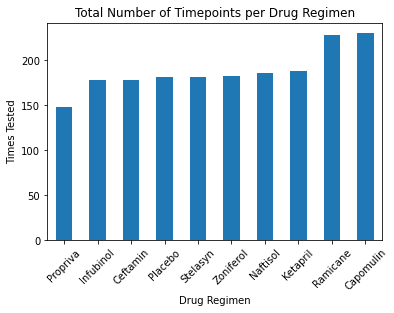

In [51]:
# Count number of trials run per drug in this study
drug_count = clean_data['Drug Regimen'].value_counts(ascending=True)

# Store names of drugs in variable
drug_labels = drug_count.index.to_list()

# Generate DataFrame of data for bar chart
count_df = pd.DataFrame({'Drug Regimen':drug_labels, 'Times Tested':drug_count})

# Title and axes labels for bar charts
title = "Total Number of Timepoints per Drug Regimen"
x_label = 'Drug Regimen'
y_label = 'Times Tested'

# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas
# Apply titles, labels, and formatting
count_df.plot.bar(x=x_label, y=y_label, ylabel=y_label, legend=False, title=title, rot = 45)

plt.show()


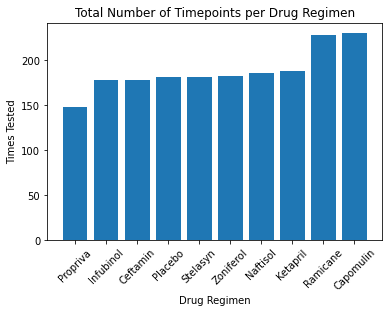

In [54]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(x_axis,drug_count,align='center')

# Generate list for placement of ticks on x_axis
tick_locations = [value for value in x_axis]

# Apply ticks, labels, titles, and formatting
plt.xticks(tick_locations, drug_labels,rotation=45)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(title)
plt.show()

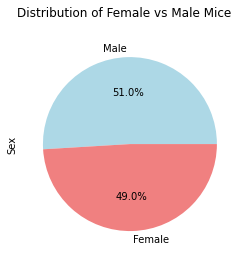

In [55]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Generate data for display in chart
sex = clean_data['Sex'].value_counts()
sex_labels = sex.index.to_list()

# Enter data into DataFrame
sex_df = pd.DataFrame({'Sex':sex})

# Set colors and title
colors = ['lightblue','lightcoral']
sex_title = 'Distribution of Female vs Male Mice'

# Plot data and format
plot = sex_df.plot.pie(subplots=True, colors=colors, legend=False, autopct='%1.1f%%', title=sex_title)


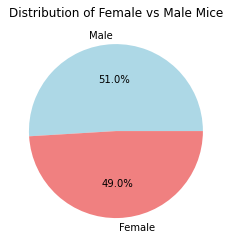

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex, labels=sex_labels, colors=colors, autopct='%1.1f%%')
plt.title(sex_title)
plt.show()

## Quartiles, Outliers and Boxplots

In [59]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_filter = clean_data['Drug Regimen'].isin(['Capomulin','Ramicane','Infubinol','Ceftamin'])
filtered_df = clean_data[drug_filter]

# Start by getting the last (greatest) timepoint for each mouse
max_tumor_df = filtered_df.groupby(['Mouse ID','Drug Regimen']).agg({'Timepoint': 'max'})

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_tumor_df = pd.merge(max_tumor_df,clean_data[['Mouse ID', 'Tumor Volume (mm3)','Timepoint','Drug Regimen',]],on=['Mouse ID','Timepoint'],how='left')

In [62]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = max_tumor_df['Drug Regimen'].unique()

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []
result = {}

for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    filter = max_tumor_df['Drug Regimen'].isin([treatment])
    tumor_vol = max_tumor_df[filter]['Tumor Volume (mm3)'].tolist()
    
    result[treatment] = tumor_vol

plot_data = pd.DataFrame(result)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Determine outliers using upper and lower bounds
for treatment in treatments:
    quartiles = plot_data[treatment].quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    lower_outlier = [x for x in plot_data[treatment] if x < lower_bound]
    upper_outlier = [x for x in plot_data[treatment] if x > upper_bound]
    
    print(f'{treatment} --------------------------------------')
    print(f'Interquartile range (IQR): {iqr}')
    print(f'Lower outlier: {lower_outlier}')
    print(f'Upper outlier: {upper_outlier}')

Infubinol --------------------------------------
Interquartile range (IQR): 11.477135160000003
Lower outlier: [36.3213458]
Upper outlier: []
Ceftamin --------------------------------------
Interquartile range (IQR): 15.577752179999997
Lower outlier: []
Upper outlier: []
Ramicane --------------------------------------
Interquartile range (IQR): 9.098536719999998
Lower outlier: []
Upper outlier: []
Capomulin --------------------------------------
Interquartile range (IQR): 7.781863460000004
Lower outlier: []
Upper outlier: []


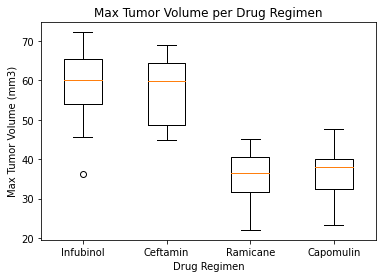

In [83]:
# set subsets
fig1, ax1 = plt.subplots()

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

ax1.set_title('Max Tumor Volume per Drug Regimen')
ax1.set_ylabel('Max Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(plot_data)
tick_locations = np.arange(1,len(treatments)+1,1)
plt.xticks(tick_locations,treatments)
plt.show()


## Line and Scatter Plots

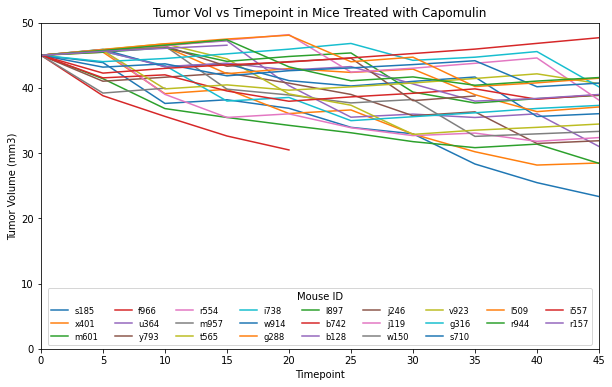

In [63]:
# Filter for data of mice only treated by Capomulin
cap_filter = clean_data['Drug Regimen'].isin(['Capomulin'])
cap_df = clean_data[cap_filter]

# Find unique mouse IDs
mice = cap_df['Mouse ID'].unique()

# Set plot figure size
plt.figure(figsize=(10,6))

# Extra visualization: plot tumor volumne of all mice with Capomulin treatment
for mouse in mice:
    
    filter = cap_df['Mouse ID'].isin([mouse])
    tumor_vol = cap_df[filter]['Tumor Volume (mm3)'].tolist()
    time = cap_df[filter]['Timepoint'].tolist()
    
    plt.plot(time,tumor_vol,label=mouse)

plt.title('Tumor Vol vs Timepoint in Mice Treated with Capomulin')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint')
plt.ylim(0,50)
plt.xlim(0,45)
plt.legend(loc='lower center',ncol=9,fontsize='small',title='Mouse ID')
plt.show()



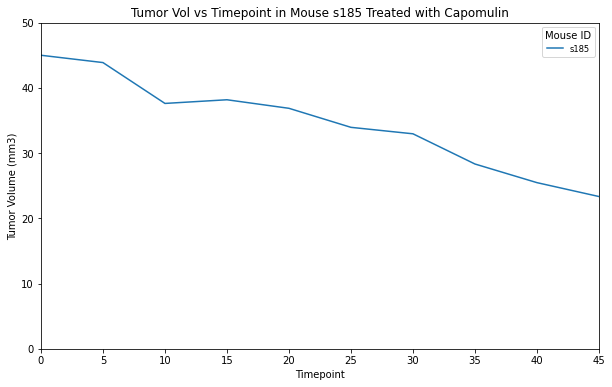

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Filter data for single mouse with Capomulin treatment
mID = 's185'
mouse = clean_data.loc[clean_data['Mouse ID'] == mID]
tumor_vol = mouse['Tumor Volume (mm3)'].tolist()
time = mouse['Timepoint'].tolist()

# Plot tumor volumne vs time point for mouse 
plt.figure(figsize=(10,6))
plt.plot(time,tumor_vol,label=mID)
plt.title(f'Tumor Vol vs Timepoint in Mouse {mID} Treated with Capomulin')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint')
plt.ylim(0,50)
plt.xlim(0,45)
plt.legend(loc='best',fontsize='small',title='Mouse ID')
plt.show()

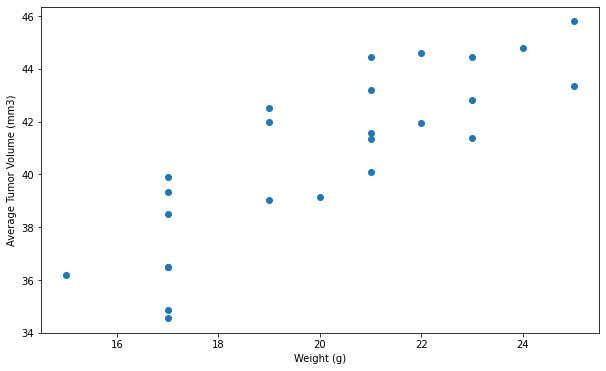

In [79]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# Save the average tumor volumes vs mice weight in a DataFrame
cap_average = cap_df.groupby(['Mouse ID']).mean()

plt.figure(figsize=(10,6))
plt.scatter(cap_average['Weight (g)'],cap_average['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


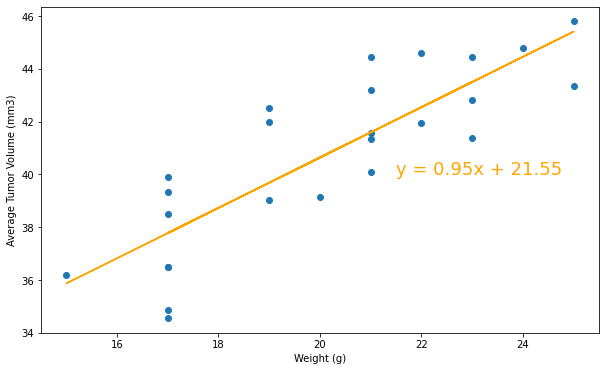

In [78]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# x and y values
x = cap_average['Weight (g)']
y = cap_average['Tumor Volume (mm3)']

# Correlation coefficient
corr=round(st.pearsonr(x,y)[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {corr}")

# Linear regression model

line = st.linregress(x,y)

y_values = x*line[0]+line[1]
line_eq = f'y = {str(round(line[0],2))}x + {str(round(line[1],2))}'
plt.figure(figsize=(10,6))
plt.scatter(x,y)
plt.plot(x,y_values,color="orange")
plt.annotate(line_eq,(21.5,40),fontsize=18,color="orange")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()